<a href="https://colab.research.google.com/github/vargaswagner/machine-learning/blob/main/k_means_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Abrimos la imagen en una variable I
I = Image.open('/content/sample_data/logo.jpg')

In [3]:
# Convertimos la Imagen a un array de acuerdo a los valores de sus pixeles
ArrayImagen = np.array(I, dtype=np.float32)/255
ArrayImagen

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

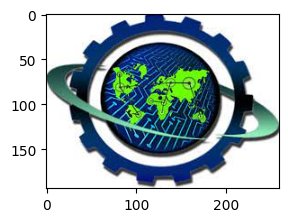

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(ArrayImagen)

In [5]:
w, h = I.size
colores = I.getcolors(w*h)
numero_colores = len(colores)
numero_pixeles = w*h

print('Número de pixeles: ', numero_pixeles)
print('Número de colores: ', numero_colores)

Número de pixeles:  50246
Número de colores:  23296


In [6]:
# Creamos 3 arreglos con informacion de cada canal de cada pixel
rojos = ArrayImagen[:, :,0]
verdes = ArrayImagen[:, :,1]
azules = ArrayImagen[:, :,2]

In [7]:
# Convertimos 3 arrays bidimensionales a vectores
Urojos = rojos.reshape((-1, 1))
Uverdes = verdes.reshape((-1, 1))
Uazules = azules.reshape((-1, 1))


In [8]:
array_unico = np.concatenate((Urojos, Uverdes, Uazules), axis = 1)
array_unico.shape

(50246, 3)

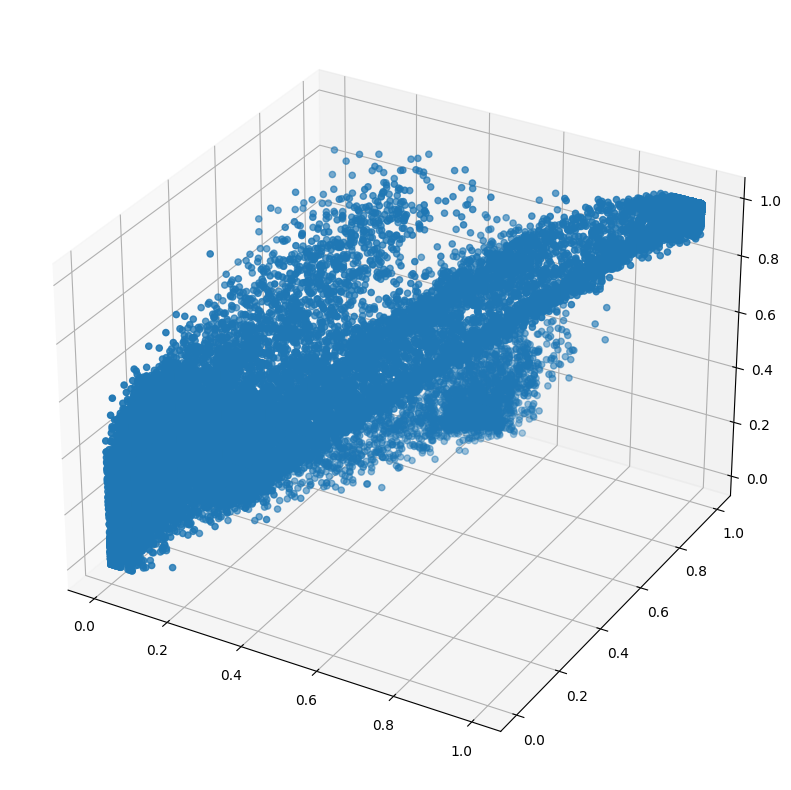

In [9]:
# Gráfica tridimensional
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(array_unico[:,0], array_unico[:, 1], array_unico[:, 2])

In [10]:
# Invocamos a k-means para agrupar el array de 3 dimensiones
from sklearn.cluster import KMeans

In [11]:
# Creamos 4 centroides con k=4

# numero_clusters = int(input('Ingrese el numero de grupos a CREAR:'))
kmedias = KMeans(n_clusters=2, n_init=10).fit(array_unico)
centroides = kmedias.cluster_centers_
etiquetas = kmedias.labels_
print('centroides', centroides.shape)
print('centroides', etiquetas.shape)
# centroides = [(0,0,0), (1,1,1)]

centroides (2, 3)
centroides (50246,)


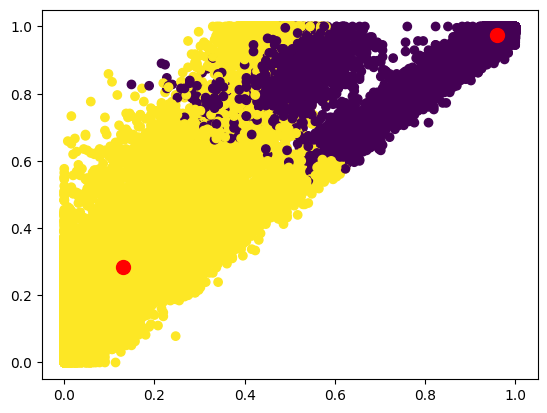

In [12]:
plt.scatter(array_unico[:, 0], array_unico[:, 1], c=kmedias.labels_)
plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='red')

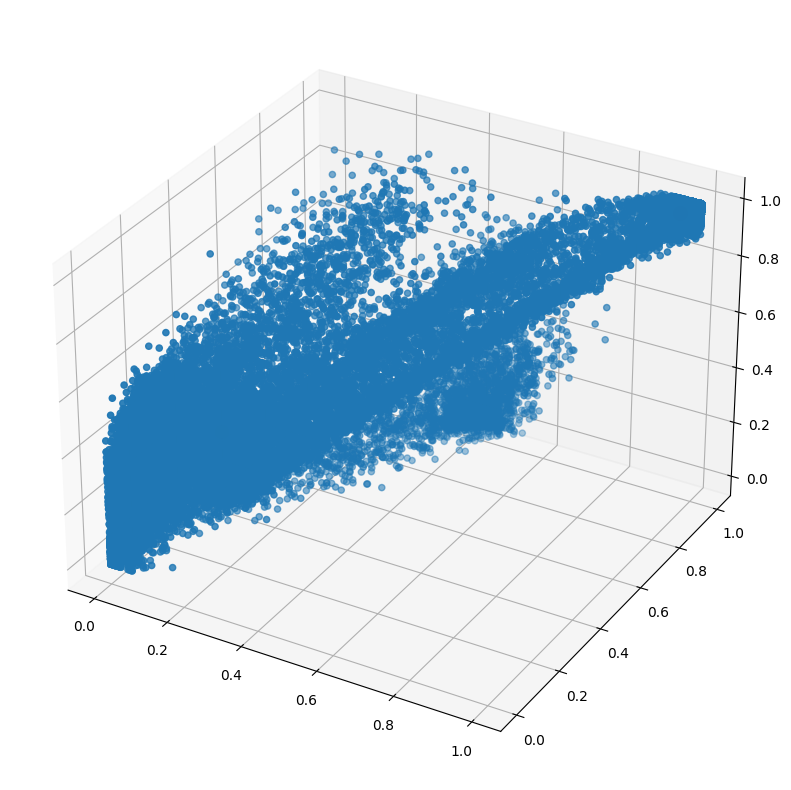

In [13]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(array_unico[:,0], array_unico[:, 1], array_unico[:, 2])
# ax.scatter(array_unico[:, 0], array_unico[:, 1], c=kmedias.labels_)
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], s=100, c='red')

In [14]:
# Reconstruimos la imagen original con los datos de los centroides como colores
m = Urojos.shape
for i in range(m[0]):
  Urojos[i] = centroides[etiquetas[i]][0]
  Uverdes[i] = centroides[etiquetas[i]][1]
  Uazules[i] = centroides[etiquetas[i]][2]

Urojos.shape = rojos.shape
Uverdes.shape = verdes.shape
Uazules.shape = azules.shape

Urojos = Urojos[:,:,np.newaxis]
Uverdes = Uverdes[:,:,np.newaxis]
Uazules = Uazules[:,:,np.newaxis]

print(Urojos.shape)


(194, 259, 1)


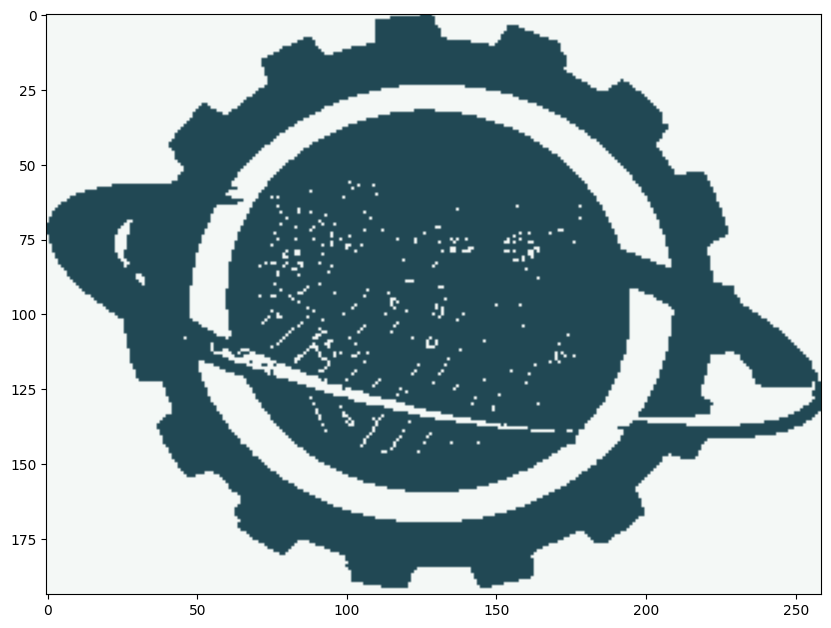

In [16]:
# Reconstruir la Imagen
ImagenRec = np.concatenate((Urojos, Uverdes, Uazules), axis=2)
plt.figure(figsize=(10,10))
plt.imshow(ImagenRec)
plt.show()